# Auto-MPG
---

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Download the data

In [2]:
df = pd.read_csv('files/datasets/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Take a Quick Look at the Data

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


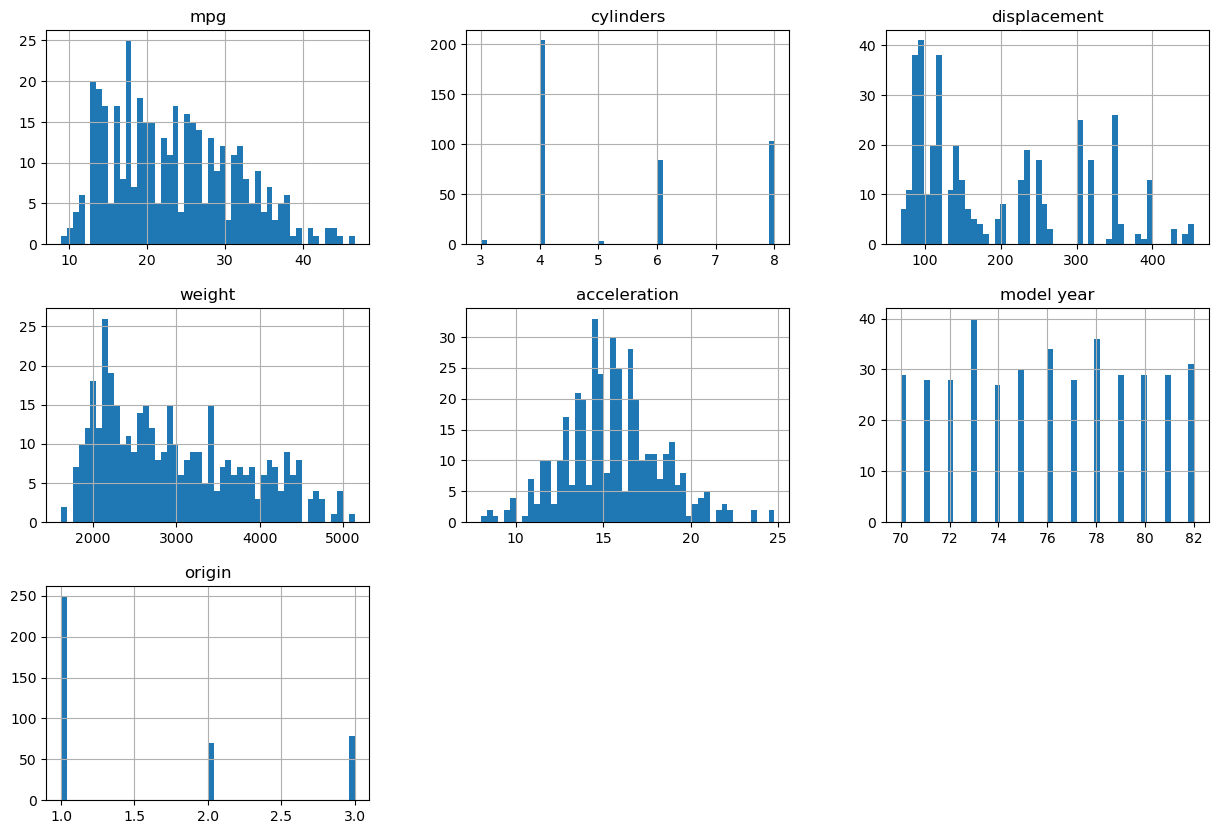

In [5]:
df.hist(bins=50, figsize=(15,10))
plt.show()

----

### Split data as stratified

In [6]:
df["mpg_cat"] = pd.cut(df["mpg"],
                       bins=[0, 20, 30, 40, np.inf],
                       labels=['Poor', 'Fair', 'Good', 'Excellent'])

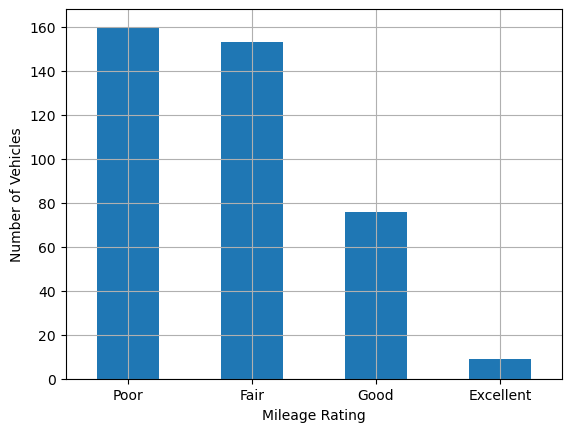

In [7]:
def plot_bins(dataframe, cat_column, x_axis_name, y_axis_name):
    
    cat_count = dataframe[cat_column].value_counts()
    cat_count.sort_index().plot.bar(rot=0, grid=True)
    
    plt.xlabel(x_axis_name)
    plt.ylabel(y_axis_name)
    
    return plt.show()

plot_bins(df, 'mpg_cat', 'Mileage Rating', 'Number of Vehicles')

In [8]:
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, stratify=df["mpg_cat"], random_state=42)

# Check stratification of splitted data
strat_test_set["mpg_cat"].value_counts() / len(strat_test_set)

# Check stratification of original data
# df["mpg_cat"].value_counts() / len(df)

Poor         0.4000
Fair         0.3875
Good         0.1875
Excellent    0.0250
Name: mpg_cat, dtype: float64

In [9]:
mpg_df = strat_train_set.copy()

---
### Pipe 1

In [10]:
def num_prefix(dataframe, str_column):
    
    # Apply function if the year is not in 19-- format    
    if (dataframe[str_column] < 1000).all():
        
        # Apply prefix concatenation to the number   
        dataframe[str_column] = dataframe[str_column].apply(lambda x: 1900 + x)
    
    else:
        pass
    
    return dataframe 

---
### Pipe 2

In [11]:
def first_word_extract(dataframe, column, new_colname):
    
    # Change data type into string
    dataframe[column] = dataframe[column].astype('str')
    
    # Split converted string and store it in a series
    col_data = pd.Series(dtype='object')
    col_data['phrase_aslist'] = dataframe[column].str.split()
    
    # Retrieve the first content in the splitted phrase contained as a list
    dataframe[new_colname] = col_data['phrase_aslist'].apply(lambda words_aslist: words_aslist[0])
    
    return dataframe 

---

## Pandas Pipeline

In [12]:
# Optional: View all of your created functions

import inspect

names = dir()

for name in names:
    obj = eval(name)
    if inspect.isfunction(obj):
        print(name)

first_word_extract
num_prefix
plot_bins
train_test_split


In [13]:
X_train_pdpipe = (mpg_df.pipe(num_prefix, 'model year')
                     .pipe(first_word_extract, 'car name', 'car brand')
                 )

In [14]:
X_train_pdpipe

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg_cat,car brand
285,17.0,8,305.0,130,3840,15.4,1979,1,chevrolet caprice classic,Poor,chevrolet
245,36.1,4,98.0,66,1800,14.4,1978,1,ford fiesta,Good,ford
25,10.0,8,360.0,215,4615,14.0,1970,1,ford f250,Poor,ford
156,16.0,8,400.0,170,4668,11.5,1975,1,pontiac catalina,Poor,pontiac
16,18.0,6,199.0,97,2774,15.5,1970,1,amc hornet,Poor,amc
...,...,...,...,...,...,...,...,...,...,...,...
394,44.0,4,97.0,52,2130,24.6,1982,2,vw pickup,Excellent,vw
20,25.0,4,110.0,87,2672,17.5,1970,2,peugeot 504,Fair,peugeot
182,28.0,4,107.0,86,2464,15.5,1976,2,fiat 131,Fair,fiat
110,22.0,4,108.0,94,2379,16.5,1973,3,datsun 610,Fair,datsun
